<a href="https://colab.research.google.com/github/laramyter/2023_Intro_Python/blob/main/ML_EES/IP/W2_S1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (Exercise) Ocean Floats Data Analysis

**Learning Objectives**

*    Creating new arrays using `linspace` and `arange`
*    Computing basic formulas with `numpy` arrays
*    Loading data from `.npy` files
*    Performing reductions (e.g. `mean`, `std` on `numpy` arrays)
*    Making 1D line plots
*    Making scatterplots
*    Annotating plots with titles and axes

In this problem, we use real data from ocean profiling floats. [ARGO](http://www.argo.ucsd.edu/) floats are autonomous robotic instruments that collect Temperature, Salinity, and Pressure data from the ocean. [ARGO](http://www.argo.ucsd.edu/) floats collect one “profile” (a set of messurements at different depths or “levels”).

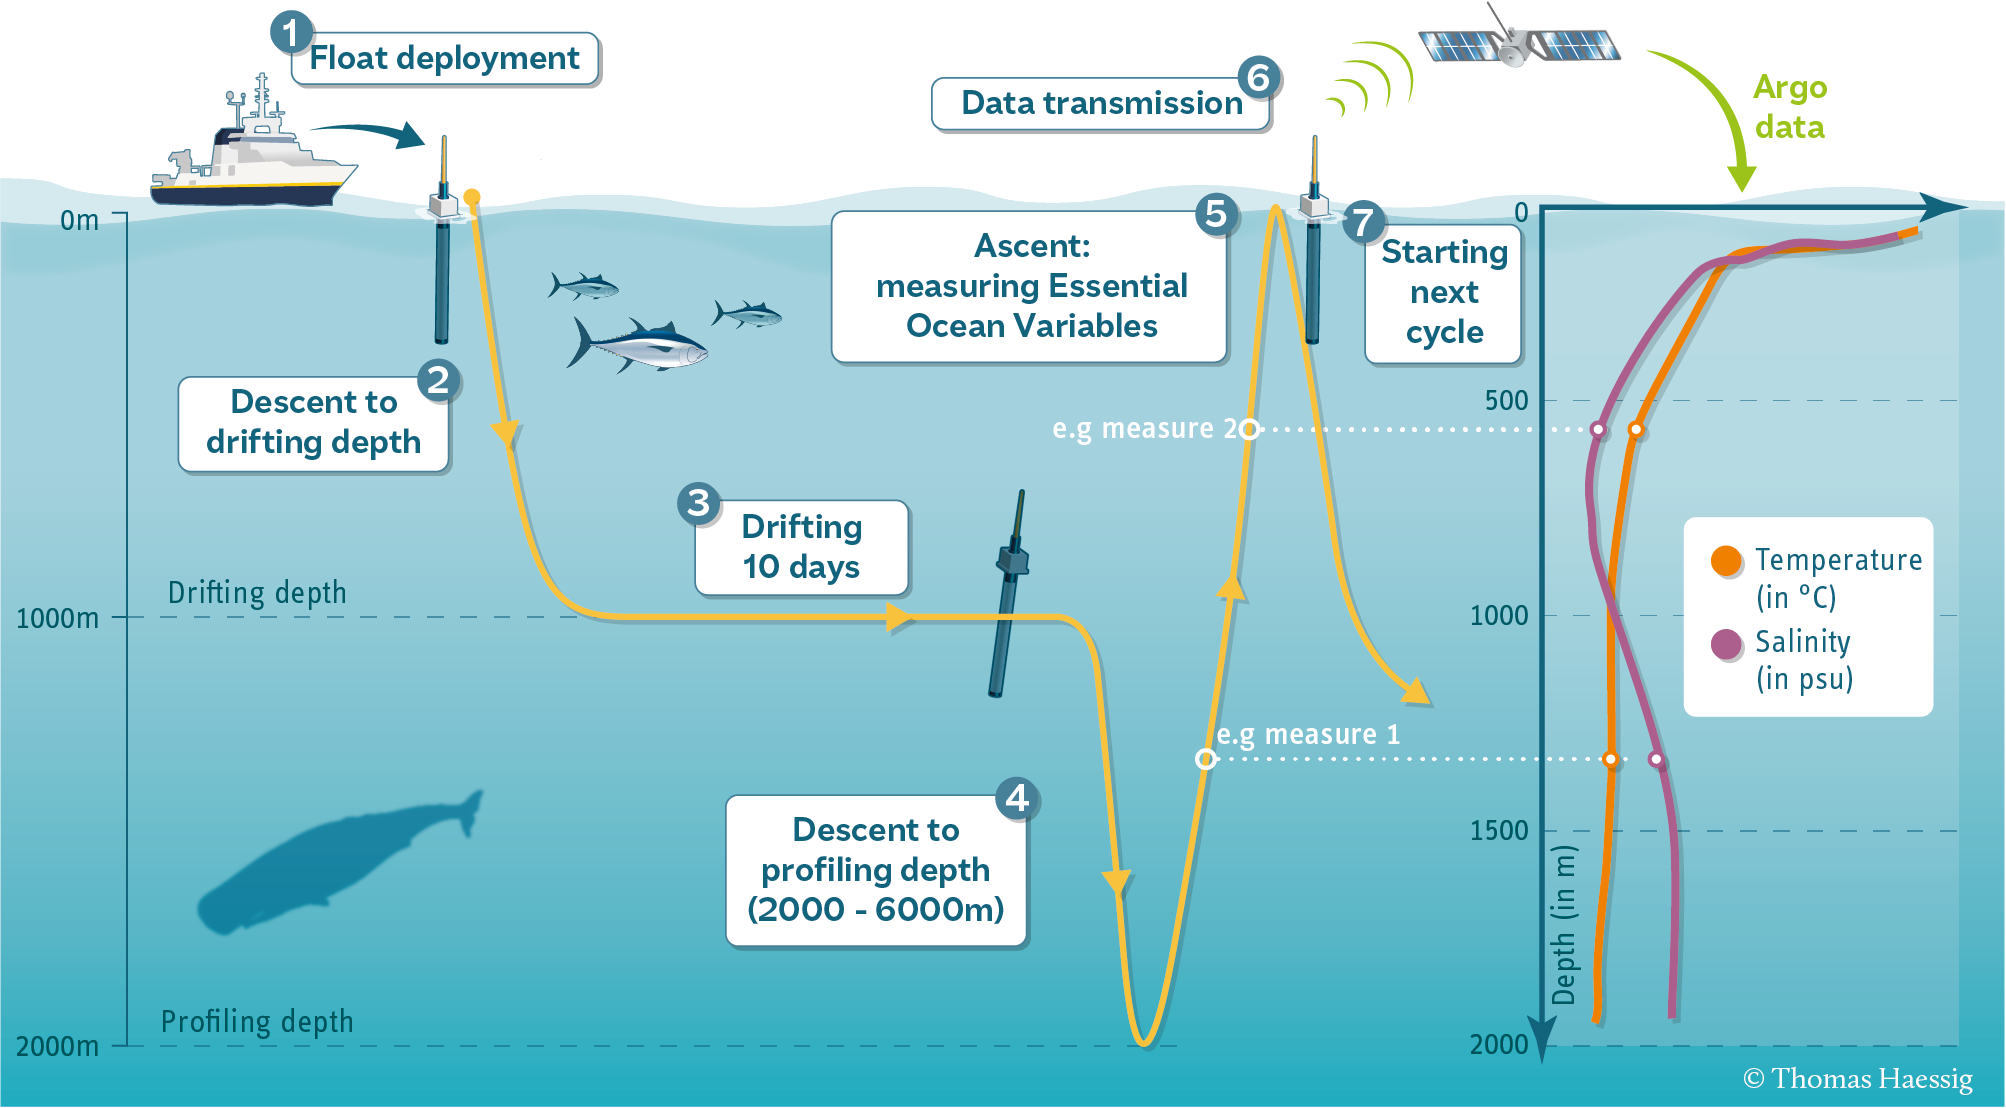


Each profile has a single latitude, longitude, and date associated with it, in addition to many different levels.

Let’s start by using [pooch](https://www.fatiando.org/pooch/latest/) to download the data files we need for this exercise. The following code will give you a list of `.npy` files that you can open in the next step.

In [1]:
import pooch

url = "https://unils-my.sharepoint.com/:u:/g/personal/tom_beucler_unil_ch/EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ?download=1"
files = pooch.retrieve(url, processor=pooch.Unzip(), known_hash='2a703c720302c682f1662181d329c9f22f9f10e1539dc2d6082160a469165009')
files

Unzipping contents of '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ' to '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip'


['/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/P.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/levels.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/T.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lon.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lat.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/S.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/date.npy']

In [2]:
import numpy as np

**Q1) Load each data file as a `numpy` array.**

You can use whatever names you want for your arrays, but we recommend:

`T`: temperature

`S`: salinity

`P`: pressure

`date`: date

`lat`: latitude

`lon`: longitude

`level`: depth level

Hint 1: Look at the file name (the items in `files`) to know which files corresponds to which variable.

Hint 2: Check out the documentation for [`np.load`](https://numpy.org/doc/stable/reference/generated/numpy.load.html).

Display the names of the items in files here

In [28]:
P = '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/P.npy'
levels = '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/levels.npy'
T = '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/T.npy'
lon = '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lon.npy'
lat = '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lat.npy'
S = '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/S.npy'
date = '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/date.npy'



Then, load the files as `numpy` arrays, for instance using list comprehension

In [32]:
P,levels,T,lon,lat,S,date = [np.load(files[i]) for i in range(len(files))]

In [33]:
print(P)


[[   6.80000019    6.0999999     6.5        ...    7.0999999
     7.20000029    6.5       ]
 [  10.69999981   10.59999943   10.39999962 ...   10.79999924
    11.09999943   10.39999962]
 [  15.69999981   14.09999943   14.89999962 ...   15.89999962
    15.59999943   15.89999962]
 ...
 [1900.60009766 1900.         1900.19995117 ... 1899.70007324
  1900.40002441 1899.80004883]
 [1949.90002441 1950.         1949.89990234 ... 1950.59997559
  1950.20007324 1949.70007324]
 [1999.30004883 1998.         1998.5        ...           nan
  2000.40002441           nan]]


**Q2) Recreate the `level` array using `np.arange` and `np.linspace`**

Hints:

*   The documentation for `np.arange` is [at this link](https://numpy.org/devdocs/reference/generated/numpy.arange.html)
*   The documentation for `np.linspace` is [at this link](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)
*   The documentation for `np.testing.assert_equal` is [at this link](https://numpy.org/doc/stable/reference/generated/numpy.testing.assert_equal.html)

Display the `level` array

In [34]:
print("levels:", levels)

levels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77]


Recreate the `level` array using `np.arange` and call it `level_arange`

In [40]:
level_arange = np.arange(0,78)

Check that `level` and `level_arange` are equal using `np.testing.assert_equal`

In [41]:
np.testing.assert_equal(levels,level_arange)

In [42]:
print(levels)
print(level_arange)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77]


Recreate the `level` array using `np.linspace` and call it `level_linspace`

In [50]:
level_linspace = np.linspace(0,77,num=78,dtype=int)

Check that `level` and `level_linspace` are equal using `np.testing.assert_equal`

In [51]:
np.testing.assert_equal(levels,level_linspace)

In [52]:
print(levels)
print(level_linspace)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77]


**Q3) Examine the shapes of `T`, `S` and `P` compared to `lon`, `lat`, `date` and `level`. How do you think they are related?**

Hint: Check out the [NDArrays subsection](#NDArrays)

Display the shapes of all loaded variables

In [53]:
T.shape

(78, 75)

In [54]:
S.shape

(78, 75)

In [55]:
P.shape

(78, 75)

In [56]:
lon.shape

(75,)

In [57]:
lat.shape

(75,)

In [58]:
date.shape

(75,)

In [60]:
levels.shape

(78,)

We can see that the shapes are different. some only have one column and some have multiple.


Based on the shapes, which dimensions do you think are shared among the arrays?

**Q4) Based on the formula below, calculate the seawater density `relative_density`, relative to pure water, as a function of the temperature, the salinity, and the pressure.**

`relative_density`$ = ρ −ρ_{Pure\ Water} = a \times S +b \times \Theta + c \times \Theta^{2}$

where:

*    The densities $\rho$ and $ρ_{Pure\ Water}$ are in units $kg/m^{3}$.
*    The constants $a$, $b$, and $c$ are provided below.
*    The function to calculate the conservative temperature $\Theta$ (in units Celcius) from temperature, salinity, and pressure is provided below.
*    The temperature $T$ is in units Celcius.
*    The salinity $S$ is in units $g/kg$.
*    The pressure $p$ is in units $dbar$.

Hint: The loaded `numpy` arrays `temperature`, `salinity`, and `pressure` already have the right units and no conversion is needed.

Sources:

1) [*Roquet, Fabien, et al. "Defining a simplified yet “realistic” equation of state for seawater." Journal of Physical Oceanography 45.10 (2015): 2564-2579.*](https://journals.ametsoc.org/view/journals/phoc/45/10/jpo-d-15-0080.1.xml)

2) [*The Gibbs SeaWater (GSW)
Oceanographic Toolbox of TEOS-10*](https://www.teos-10.org/pubs/gsw/html/gsw_front_page.html). [(License)](https://www.teos-10.org/pubs/gsw/html/gsw_licence.html)

Below are the constants a, b, and c:

In [61]:
a = 7.718e-1
b = -8.44e-2
c = -4.561e-3

Let's import the library [`gsw`](https://teos-10.github.io/GSW-Python/) that contains the function `CS_from_t`to calculate the conservative temperature $\Theta$ from temperature, salinity, and pressure.

In [62]:
!pip install gsw
from gsw import CT_from_t

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 22.7 MB/s eta 0:00:00


Now it's all up to you. Here's the equation to avoid having to scroll back up:

`relative_density`$ = ρ −ρ_{Pure\ Water} = a \times S +b \times \Theta + c \times \Theta^{2}$

Calculate the conservative temperature

Hint: use [CT_from_t](https://www.teos-10.org/pubs/gsw/html/gsw_CT_from_t.html)

In [64]:
ct_from_t = CT_from_t(S,T,P)

Calculate the `relative density` using the equation above

In [66]:
relative_density = a*S+b*ct_from_t+c*ct_from_t**2
print(relative_density)

[[24.26878778 24.30901623 24.18510597 ... 24.37483439 23.60704513
  23.98828331]
 [24.32477667 24.32400413 24.19045883 ... 24.53101768 24.09992029
  23.98930505]
 [24.45644758 24.33382758 24.19427794 ... 24.58041622 24.21339484
  24.000865  ]
 ...
 [26.58088425 26.58466521 26.58605858 ... 26.59390729 26.5980916
  26.59702996]
 [26.58479005 26.58939524 26.59027359 ... 26.59905835 26.60307089
  26.60154496]
 [26.58919785 26.59362837 26.59605156 ...         nan 26.60731704
          nan]]


**Q4) Make a plot for each column of data in `T`, `S`, `P`, and
`relative_density` (four plots)**

For this question, we have to use the [Pyplot interface](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) of the [Matplotlib library](https://matplotlib.org/) for visualization even if we have not covered it extensively in class yet. But fear not as we provide easy-to-follow instructions below. 😊

The first step is to import Pyplot. Simply execute the code below.

In [67]:
import matplotlib.pyplot as plt

Then, we will plot variables as a function of the ocean depth, `level`. Simply read the documentation [at this link](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) to infer the correct syntax. Label your axes using `plt.xlabel` and `plt.ylabel`, and add a title using `plt.title`.

Hint: The vertical scale should use the `level` data to be consistent with oceanographic conventions.

Hint 2: Each plot should have a line for each column of data. It will look messy, like the plot below:

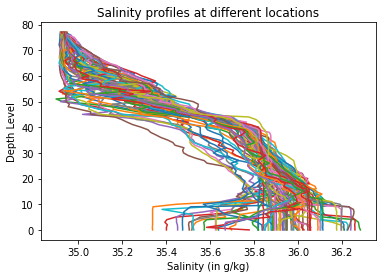

Text(0.5, 1.0, 'Temperature of the ocean')

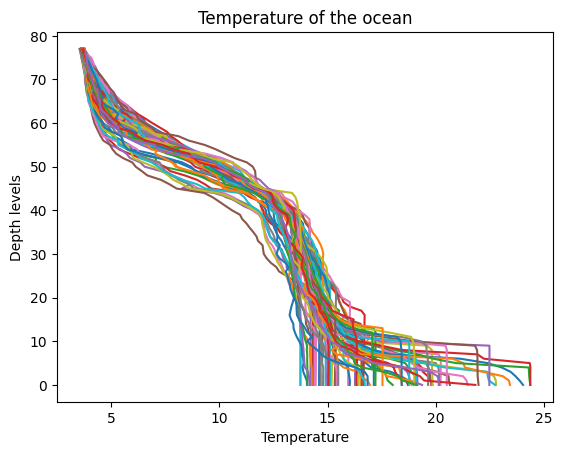

In [70]:
plt.plot(T,levels); # The semi-colon prevents printing the line objects
plt.xlabel('Temperature') # Takes a string as argument
plt.ylabel('Depth levels')
plt.title('Temperature of the ocean')

Make more plots below:

Text(0.5, 1.0, 'Pressure in the ocean')

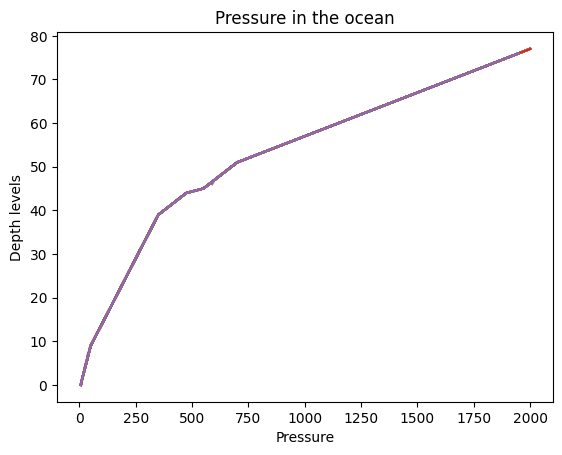

In [72]:
plt.plot(P,levels); # The semi-colon prevents printing the line objects
plt.xlabel('Pressure') # Takes a string as argument
plt.ylabel('Depth levels')
plt.title('Pressure in the ocean')

Text(0.5, 1.0, 'Salinity of the ocean')

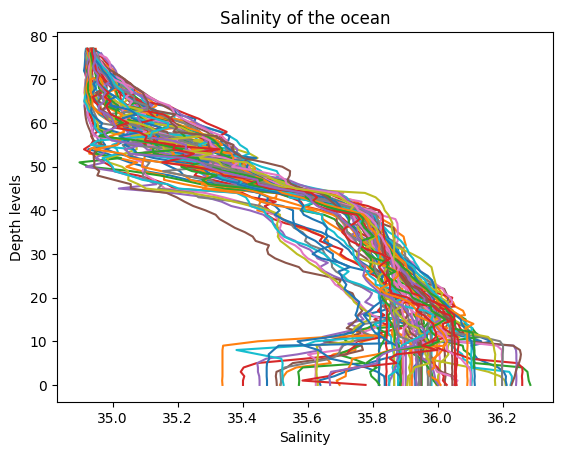

In [73]:
plt.plot(S,levels); # The semi-colon prevents printing the line objects
plt.xlabel('Salinity') # Takes a string as argument
plt.ylabel('Depth levels')
plt.title('Salinity of the ocean')

Text(0.5, 1.0, 'Relative density of the ocean')

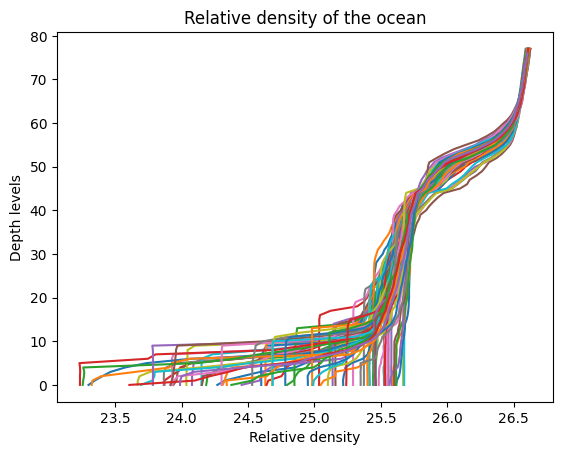

In [74]:
plt.plot(relative_density,levels); # The semi-colon prevents printing the line objects
plt.xlabel('Relative density') # Takes a string as argument
plt.ylabel('Depth levels')
plt.title('Relative density of the ocean')

**Q5) Compute the mean and standard deviation of each of `T`, `S`, `P`, and `seawater_density` at each depth in `level`.**

Hint: You may want to read the documentation at [this link](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) and [this link](https://numpy.org/doc/stable/reference/generated/numpy.std.html).

Hint 2: You can check that you took the mean and standard deviations along the correct axes by checking the `shape` of your results.

Compute the means...

In [99]:
mean_T = np.mean(T,axis=1)
mean_T.shape

(78,)

In [79]:
mean_S = np.mean(S,axis=1)
mean_S.shape

(78,)

In [81]:
mean_P = np.mean(P,axis=1)
mean_P.shape

(78,)

In [80]:
mean_rd = np.mean(relative_density,axis=1)
mean_rd.shape

(78,)

... and the standard deviations.

In [85]:
std_T = np.std(T,axis=1)
std_T.shape

(78,)

In [86]:
std_S = np.std(S,axis=1)
std_S.shape

(78,)

In [87]:
std_P = np.std(P,axis=1)
std_P.shape

(78,)

In [88]:
std_rd = np.std(relative_density,axis=1)
std_rd.shape

(78,)

Check that they have the same shape as your vertical level `lev` coordinate:

In [92]:
np.testing.assert_equal(mean_T.shape,levels.shape)
np.testing.assert_equal(mean_S.shape,levels.shape)
np.testing.assert_equal(mean_P.shape,levels.shape)
np.testing.assert_equal(mean_rd.shape,levels.shape)

np.testing.assert_equal(std_T.shape,levels.shape)
np.testing.assert_equal(std_S.shape,levels.shape)
np.testing.assert_equal(std_P.shape,levels.shape)
np.testing.assert_equal(std_rd.shape,levels.shape)

**Q6) Now make similar plots, but show only the mean `T`, `S`, `P`, and `seawater_density` at each depth. Show error bars on each plot using the standard deviations.**

Hint: If you are feeling adventurous, you can directly use the [`plt.errorbar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html) function.

Hint 2: You should get plots similar to the one below

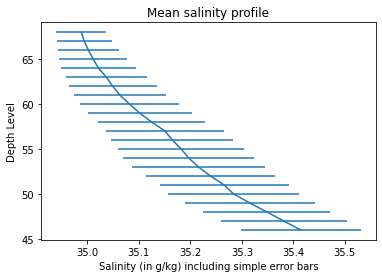

Text(0.5, 1.0, 'Mean temperature profile')

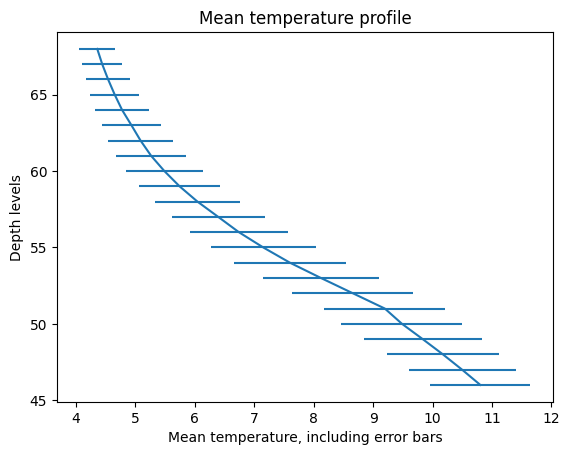

In [95]:
plt.errorbar(mean_T,levels,xerr=std_T)
plt.xlabel('Mean temperature, including error bars')
plt.ylabel('Depth levels')
plt.title('Mean temperature profile')

Three more plots and we'll be all set! 🙂

Text(0.5, 1.0, 'Mean salinity profile')

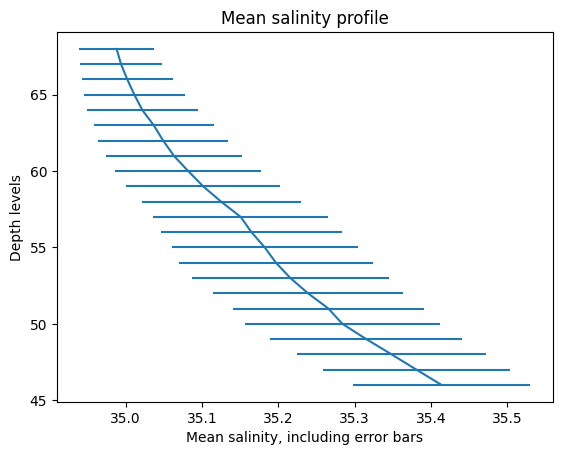

In [96]:
plt.errorbar(mean_S,levels,xerr=std_S)
plt.xlabel('Mean salinity, including error bars')
plt.ylabel('Depth levels')
plt.title('Mean salinity profile')

Text(0.5, 1.0, 'Mean pressure profile')

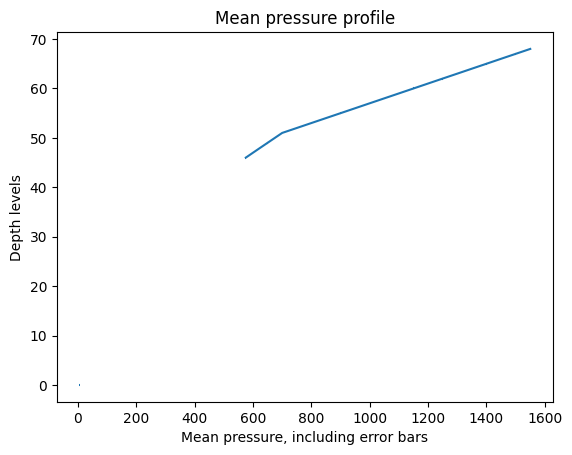

In [97]:
plt.errorbar(mean_P,levels,xerr=std_P)
plt.xlabel('Mean pressure, including error bars')
plt.ylabel('Depth levels')
plt.title('Mean pressure profile')

Text(0.5, 1.0, 'Mean relative density profile')

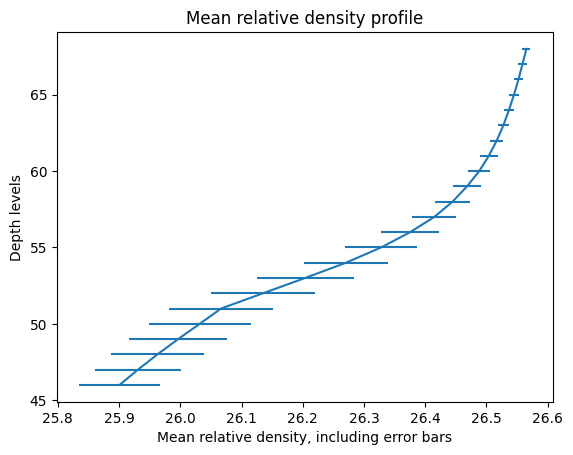

In [103]:
plt.errorbar(mean_rd,levels,xerr=std_rd)
plt.xlabel('Mean relative density, including error bars')
plt.ylabel('Depth levels')
plt.title('Mean relative density profile')

**Q7) Account For Missing Data**

The profiles contain many missing values. These are indicated by the special “Not a Number” value, or `np.nan`.

When you take the mean or standard deviation of data with NaNs in it, the entire result becomes `NaN`. Instead, if you use the special functions `np.nanmean` and `np.nanstd`, you tell NumPy to ignore the NaNs.

Recalculate the means and standard deviations as in the previous sections using these functions and plot the results.

Hint: Links to the [`np.nanmean` documentation](https://numpy.org/doc/stable/reference/generated/numpy.nanmean.html) and the [`np.nanstd` documentation](https://numpy.org/doc/stable/reference/generated/numpy.nanstd.html).

Recalculate the means below ignoring the missing values. We trust that you can now come up with the full syntax yourself 😎

In [101]:
nanmean_T = np.nanmean(T,axis=1)
nanmean_S = np.nanmean(S,axis=1)
nanmean_P = np.nanmean(P,axis=1)
nanmean_rd = np.nanmean(relative_density,axis=1)

Similarly, recalculate the standard deviations ignoring the missing values.

In [102]:
nanstd_T = np.nanstd(T,axis=1)
nanstd_S = np.nanstd(S,axis=1)
nanstd_P = np.nanstd(P,axis=1)
nanstd_rd = np.nanstd(relative_density,axis=1)

Text(0.5, 1.0, 'Mean temperature profile, without NAN values')

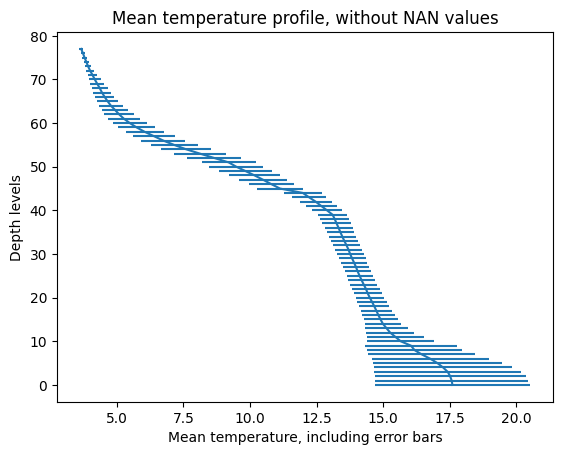

In [104]:
plt.errorbar(nanmean_T,levels,xerr=nanstd_T)
plt.xlabel('Mean temperature, including error bars')
plt.ylabel('Depth levels')
plt.title('Mean temperature profile, without NAN values')

Text(0.5, 1.0, 'Mean salinity profile, without NAN values')

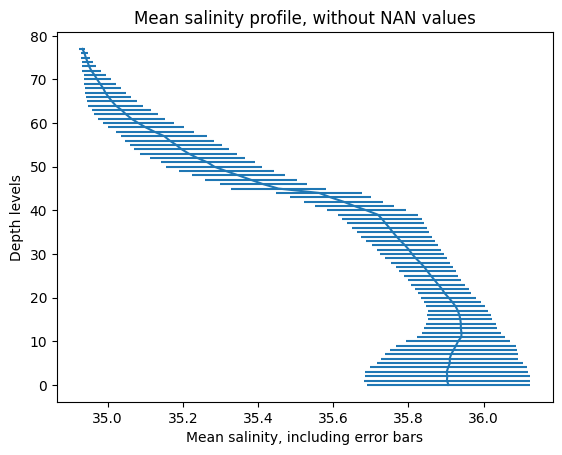

In [105]:
plt.errorbar(nanmean_S,levels,xerr=nanstd_S)
plt.xlabel('Mean salinity, including error bars')
plt.ylabel('Depth levels')
plt.title('Mean salinity profile, without NAN values')

Text(0.5, 1.0, 'Mean pressure profile, without NAN values')

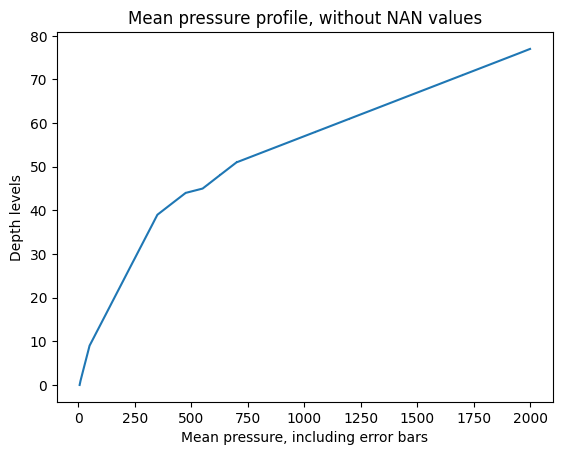

In [106]:
plt.errorbar(nanmean_P,levels,xerr=nanstd_P)
plt.xlabel('Mean pressure, including error bars')
plt.ylabel('Depth levels')
plt.title('Mean pressure profile, without NAN values')

Text(0.5, 1.0, 'Mean relative density profile, without NAN values')

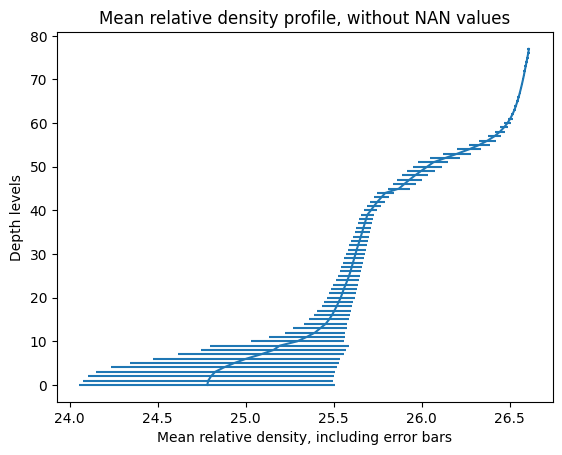

In [107]:
plt.errorbar(nanmean_rd,levels,xerr=nanstd_rd)
plt.xlabel('Mean relative density, including error bars')
plt.ylabel('Depth levels')
plt.title('Mean relative density profile, without NAN values')

**Q8) Create a scatter plot of the longitudinal (`lon`) and latitudinal (`lat`) coordinates of the ARGO floats.**

Again, we have not discussed it in the tutorial, but there is a really convenient scatter plot function called [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) provided by the Pyplot interface.

Bonus: Label your figure using `plt.xlabel`, `plt.ylabel`, and `plt.title`.

Bonus 2: Increase the fontsize of your labels by adding a `fontsize=` argument to the label functions.

Bonus 3: Make your scatter plot beautiful by changing the arguments of [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) listed in the documentation, for example `s=`.

(Text(0.5, 0, 'longitude'),
 Text(0, 0.5, 'latitude'),
 Text(0.5, 1.0, 'Coordinates of the ARGO floats'))

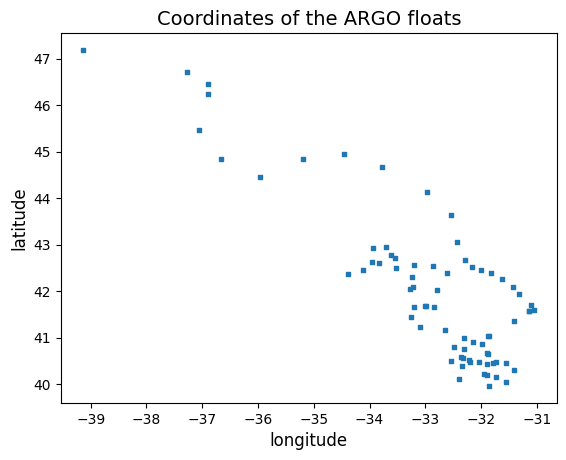

In [118]:
plt.scatter(lon,lat,s=10,marker='s')
plt.xlabel('longitude',fontsize=12),plt.ylabel('latitude',fontsize=12),plt.title('Coordinates of the ARGO floats',fontsize=14) # Fancy bonuses
